Found 14385 images belonging to 2 classes.
Found 1598 images belonging to 2 classes.
Found 1777 images belonging to 2 classes.


C:\Users\gargn\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
C:\Users\gargn\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
450/450 ━━━━━━━━━━━━━━━━━━━━ 36s 71ms/step - accuracy: 0.7799 - loss: 0.5036 - val_accuracy: 0.9349 - val_loss: 0.1913
Epoch 2/5
450/450 ━━━━━━━━━━━━━━━━━━━━ 18s 39ms/step - accuracy: 0.9033 - loss: 0.2438 - val_accuracy: 0.9055 - val_loss: 0.2617
Epoch 3/5
450/450 ━━━━━━━━━━━━━━━━━━━━ 18s 41ms/step - accuracy: 0.9221 - loss: 0.1971 - val_accuracy: 0.9637 - val_loss: 0.1102
Epoch 4/5
450/450 ━━━━━━━━━━━━━━━━━━━━ 19s 41ms/step - accuracy: 0.9402 - loss: 0.1531 - val_accuracy: 0.9518 - val_loss: 0.1482
Epoch 5/5
450/450 ━━━━━━━━━━━━━━━━━━━━ 20s 45ms/step - accuracy: 0.9449 - loss: 0.1463 - val_accuracy: 0.8924 - val_loss: 0.3755
1777/1777 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8481 - loss: 0.4602
Test Accuracy: 0.91
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
Predicted: Vehicle
Actual: Vehicle


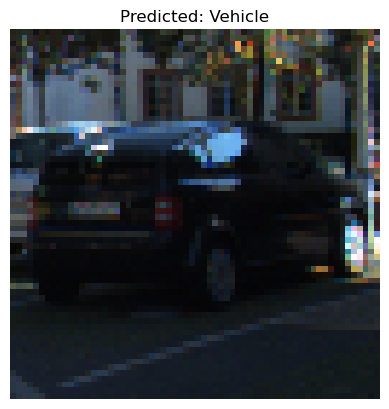

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

# Directories
train_dir = r"C:\Users\gargn\Desktop\data\train"
test_dir = r"C:\Users\gargn\Desktop\data\test"

# Image size (to match input layer)
img_size = (64, 64)
batch_size = 32

# Data Generators
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.1)

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

val_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)

test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=1,
    class_mode='binary',
    shuffle=False
)

# Model
model = Sequential([
    Flatten(input_shape=(64, 64, 3)),     # Flatten image to 1D
    Dense(128, activation='relu'),       # Hidden layer
    Dense(64, activation='relu'),        # Another hidden layer
    Dense(1, activation='sigmoid')       # Output: binary
])

# Compile
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Train
model.fit(train_data, epochs=5, batch_size=batch_size, validation_data=val_data)

# Evaluate
test_loss, test_acc = model.evaluate(test_data)
print(f"Test Accuracy: {test_acc:.2f}")

# Predict a sample test image
i = 1000  # Index of test image
img = test_data[i][0][0]       # Image
actual = test_data[i][1][0]    # Actual label
pred_prob = model.predict(np.expand_dims(img, axis=0))[0][0]
pred = 1 if pred_prob > 0.5 else 0

print("Predicted:", "Vehicle" if pred else "Non-Vehicle")
print("Actual:", "Vehicle" if actual else "Non-Vehicle")

# Visualize
plt.imshow(img)
plt.title(f"Predicted: {'Vehicle' if pred else 'Non-Vehicle'}")
plt.axis('off')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
Predicted: Non-Vehicle
Actual: Non-Vehicle


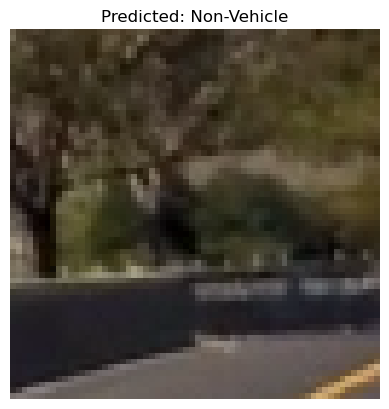

In [3]:
i = 269  # Index of test image
img = test_data[i][0][0]       # Image
actual = test_data[i][1][0]    # Actual label
pred_prob = model.predict(np.expand_dims(img, axis=0))[0][0]
pred = 1 if pred_prob > 0.5 else 0

print("Predicted:", "Vehicle" if pred else "Non-Vehicle")
print("Actual:", "Vehicle" if actual else "Non-Vehicle")

# Visualize
plt.imshow(img)
plt.title(f"Predicted: {'Vehicle' if pred else 'Non-Vehicle'}")
plt.axis('off')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


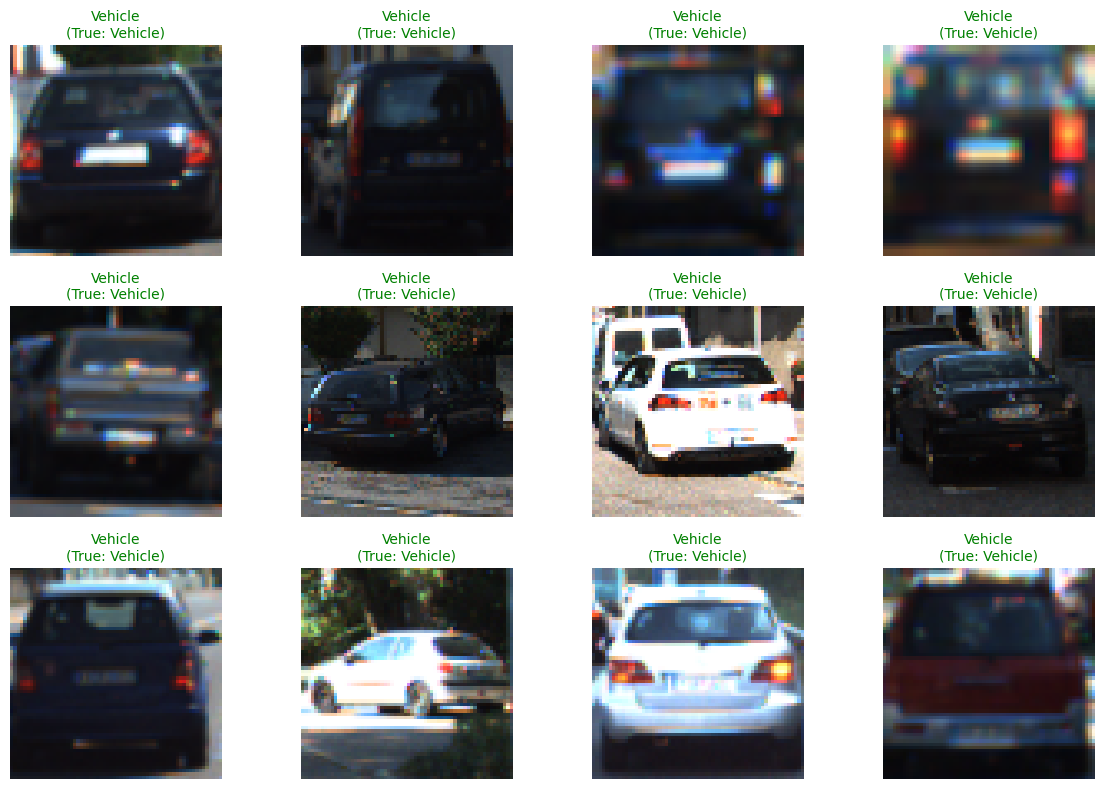

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


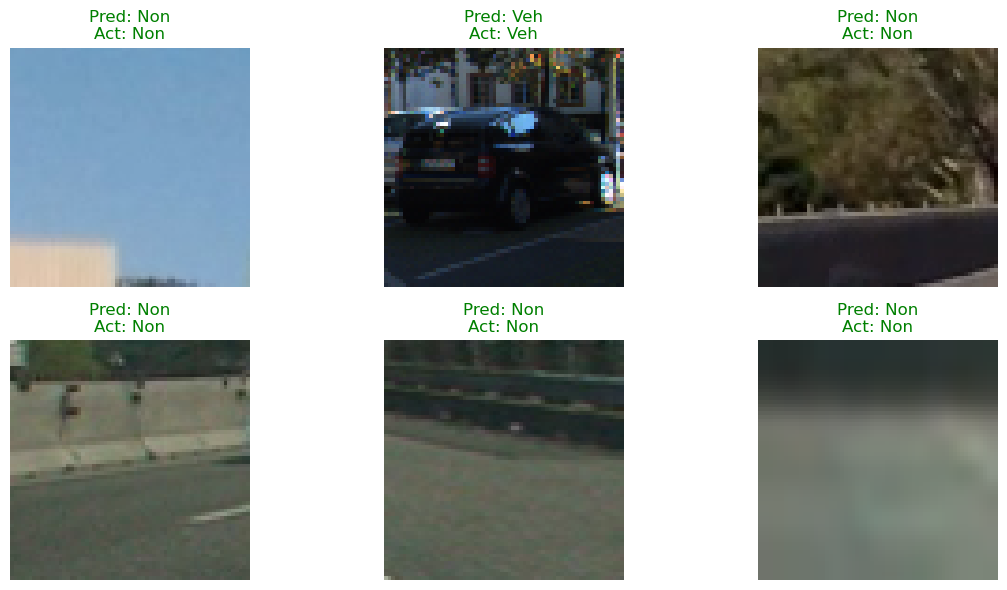

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# 🔢 Choose any specific indices you want to display
indices = [100, 1000, 256, 569, 758, 852]

cols = 3
rows = (len(indices) + cols - 1) // cols

plt.figure(figsize=(12, 6))

# Manually plot each image
i = indices[0]
img = test_data[i][0][0]
actual = test_data[i][1][0]
pred = 1 if model.predict(np.expand_dims(img, axis=0))[0][0] > 0.5 else 0
plt.subplot(rows, cols, 1)
plt.imshow(img)
plt.axis('off')
plt.title(f"Pred: {'Veh' if pred else 'Non'}\nAct: {'Veh' if actual else 'Non'}", color='green' if pred == actual else 'red')

i = indices[1]
img = test_data[i][0][0]
actual = test_data[i][1][0]
pred = 1 if model.predict(np.expand_dims(img, axis=0))[0][0] > 0.5 else 0
plt.subplot(rows, cols, 2)
plt.imshow(img)
plt.axis('off')
plt.title(f"Pred: {'Veh' if pred else 'Non'}\nAct: {'Veh' if actual else 'Non'}", color='green' if pred == actual else 'red')

i = indices[2]
img = test_data[i][0][0]
actual = test_data[i][1][0]
pred = 1 if model.predict(np.expand_dims(img, axis=0))[0][0] > 0.5 else 0
plt.subplot(rows, cols, 3)
plt.imshow(img)
plt.axis('off')
plt.title(f"Pred: {'Veh' if pred else 'Non'}\nAct: {'Veh' if actual else 'Non'}", color='green' if pred == actual else 'red')

i = indices[3]
img = test_data[i][0][0]
actual = test_data[i][1][0]
pred = 1 if model.predict(np.expand_dims(img, axis=0))[0][0] > 0.5 else 0
plt.subplot(rows, cols, 4)
plt.imshow(img)
plt.axis('off')
plt.title(f"Pred: {'Veh' if pred else 'Non'}\nAct: {'Veh' if actual else 'Non'}", color='green' if pred == actual else 'red')

i = indices[4]
img = test_data[i][0][0]
actual = test_data[i][1][0]
pred = 1 if model.predict(np.expand_dims(img, axis=0))[0][0] > 0.5 else 0
plt.subplot(rows, cols, 5)
plt.imshow(img)
plt.axis('off')
plt.title(f"Pred: {'Veh' if pred else 'Non'}\nAct: {'Veh' if actual else 'Non'}", color='green' if pred == actual else 'red')

i = indices[5]
img = test_data[i][0][0]
actual = test_data[i][1][0]
pred = 1 if model.predict(np.expand_dims(img, axis=0))[0][0] > 0.5 else 0
plt.subplot(rows, cols, 6)
plt.imshow(img)
plt.axis('off')
plt.title(f"Pred: {'Veh' if pred else 'Non'}\nAct: {'Veh' if actual else 'Non'}", color='green' if pred == actual else 'red')

plt.tight_layout()
plt.show()
